Loading in the libraries I will use.

In [1]:
import json
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

Reading in the json file. This data is composed of tips that people have left on Yelp about various restaurants. It contains the business ID, the date, the number of likes, the text of the tip, and the user's ID.

In [2]:
tips = []
for line in open('yelp_tip.json', 'r'):
    tips.append(json.loads(line))

Creating a list of data for each variable in the json file.

In [3]:
business_id = []
date = []
likes = []
text = []
user_id = []
for i in range(len(tips)):
    business_id.append(tips[i]['business_id'])
    date.append(tips[i]['date'])
    likes.append(tips[i]['likes'])
    text.append(tips[i]['text'])
    user_id.append(tips[i]['user_id'])

Putting the lists into a dataframe where each list is a column.

In [4]:
tips_df = pd.DataFrame({'business_id': business_id, 'date': date, 'likes': likes, 'text': text, 'user_id': user_id})
tips_df.head()

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,2ThtBbeDqFkVi6LugUOcVA,2012-11-25,0,Don't use them! Double charged my boyfriend an...,M5n8mMFoeXjnJEV2gxyGGA
2,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
3,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
4,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ


Cleaning the date variable by turning it into a Python datetime object. I am then turning the datetime object into something numeric that matplotlib can interpret so I can plot it.

In [5]:
tips_df['date'] = [datetime.strptime(x, '%Y-%m-%d') for x in tips_df['date']]
tips_df['date'] = matplotlib.dates.date2num(tips_df['date'])
tips_df.head()

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,734699.0,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,2ThtBbeDqFkVi6LugUOcVA,734832.0,0,Don't use them! Double charged my boyfriend an...,M5n8mMFoeXjnJEV2gxyGGA
2,jH19V2I9fIslnNhDzPmdkA,735822.0,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
3,dAa0hB2yrnHzVmsCkN4YvQ,735404.0,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
4,dAa0hB2yrnHzVmsCkN4YvQ,736249.0,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ


Plotting the number of likes over time with our newly formatted date variable.

Text(0, 0.5, 'Number of Likes')

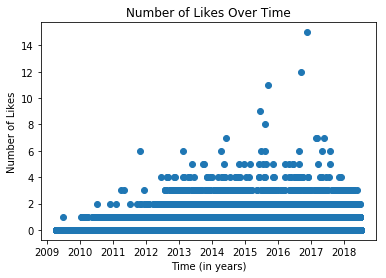

In [6]:
plt.plot_date('date', 'likes', data = tips_df)
plt.title('Number of Likes Over Time')
plt.xlabel('Time (in years)')
plt.ylabel('Number of Likes')

We can see that while most tips still get close to 0 likes, the number of likes does appear to have increased over time. This probably means that the number of people using Yelp has increased.

We can look at how many likes the tips typically get.

In [7]:
tips_df.describe()

,date,likes
count,1.185348e+06,1.185348e+06
mean,7.353923e+05,1.660609e-02
std,8.046100e+02,1.463528e-01
min,7.335120e+05,0.000000e+00
25%,7.346940e+05,0.000000e+00
50%,7.353360e+05,0.000000e+00
75%,7.360920e+05,0.000000e+00
max,7.368770e+05,1.500000e+01


We can calculate the average number of tips posted by each user in our dataset:

In [8]:
num_user_tips = Counter(tips_df.user_id).values()
print("Average number of tips posted per user: ", np.round(sum(num_user_tips) / len(num_user_tips), 2))

Average number of tips posted per user:  3.89


We can similarly calculate the average number of tips given for each restaurant:

In [9]:
num_restaurant_tips = Counter(tips_df.business_id).values()
print("Average number of tips for restaurants: ", np.round(sum(num_restaurant_tips) / len(num_restaurant_tips), 2))

Average number of tips for restaurants:  9.75


We can also check the average number of likes for each tip.

In [10]:
print("Average number of likes for each tip: ", np.round(np.mean(tips_df.likes), 4))

Average number of likes for each tip:  0.0166


I want to plot the frequency of tips posted by the 15 most active users. We can then look at these users and compare the average number of likes that they received per tip to see which users post the best tips. I am going to find the most common tips using Counter and then seperate the tuples out. Then I will create a list that has users as entries with each user being listed as many times as he/she posted a tip. Then I can plot the frequency.

In [11]:
most_tips = Counter(tips_df['user_id']).most_common(15)
id_tips = [seq[0] for seq in most_tips]
num_tips = [seq[1] for seq in most_tips]

In [12]:
user_tips = []
for i in range(len(id_tips)):
    l = [id_tips[i]] * num_tips[i]
    user_tips.extend(l)

Text(0.5, 1.0, 'Frequency of Tips Posted by User')

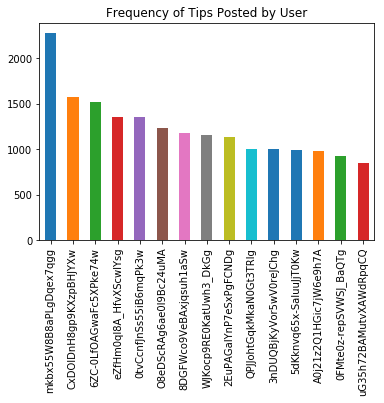

In [13]:
pd.DataFrame(user_tips)[0].value_counts().plot(kind='bar')
plt.title("Frequency of Tips Posted by User")

I want to look at the average number of likes for the 15 most frequent users. This can tell us which users' tips are most reliable.

In [14]:
user_df = tips_df[tips_df['user_id'].isin(id_tips)]
user_df.groupby(['user_id'])['likes'].mean()

user_id
0FMte0z-repSVWSJ_BaQTg    0.107027
0tvCcnfJnSs55iB6mqPk3w    0.124260
2EuPAGalYnP7eSxPgFCNDg    0.107080
3nDUQBjKyVor5wV0reJChg    0.093186
5dKknvq65x-SaluuJjT0Kw    0.038114
6ZC-0LfOAGwaFc5XPke74w    0.015779
8DGFWco9VeBAxjqsuh1aSw    0.021222
A0j21z2Q1HGic7jW6e9h7A    0.158215
CxDOIDnH8gp9KXzpBHJYXw    0.071111
O8eDScRAg6ae0l9Bc24uMA    0.025827
QPJJohtGqkMkaN0Gt3TRIg    0.049603
WJKocp9RE0KatUwh3_DkGg    0.052038
eZfHm0qI8A_HfvXScwIYsg    0.089102
mkbx55W8B8aPLgDqex7qgg    0.522408
uG35h72BAMutvXAWdRpqCQ    0.090909
Name: likes, dtype: float64

We can see that tips from the user with ID mkbx55W8B8aPLgDqex7qgg receive the most likes by a large amount of the 15 most frequent users. We could perform a further text analysis comparing the content of the tips of these 15 users to try and determine what makes a certain tip generate more ilkes, and specifically why this user generates more likes than the other users.